# K-means clustering

## import library

In [2045]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2046]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

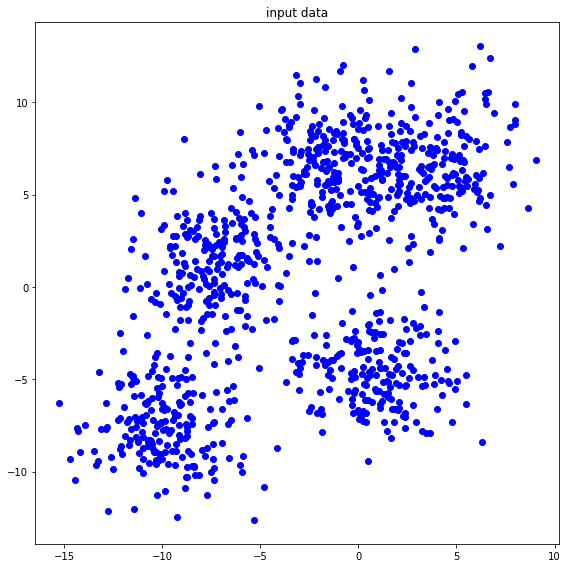

In [2047]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [2048]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    difference=feature-center
    distance=(difference[:,0]**2+difference[:,1]**2)**(1/2)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [2049]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks 
    #

    # filter out the features correspoding to the given label. 
    target_feature=feature[label_feature == label]

    # if possible, calculate the centroid
    if target_feature.any():
        center_x=target_feature[:,0].mean()
        center_y=target_feature[:,1].mean()
        centroid=np.c_[center_x,center_y]
    else: 
        # else, return a flag array to maintain the previous centroid instead of calculating a new one. 
        return np.array([False])
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [2050]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    # get the index where the distance value is the minimum one.(labelling)
    label_feature=np.argmin(distance,axis=1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [2051]:
number_cluster          = 2
number_iteration        = 30     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [2052]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_02
label_feature=label_feature_02
label=np.array(range(number_cluster))

# iterate to make the loss converge.
for iteration in range(number_iteration):
    
    # compute and store the centroid value of the labels respectively. 
    # compute the distance between all centroids and all the features. 
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        # if the cluster doesn't have any elements, mainain the previous centroid instead of updating with a new one. 
        # in this situation, in fact computing a new centroid is impossible.
        if center.any():
            centroid[iteration,i,:] =center 
        else:
            centroid[iteration,i,:] =centroid[iteration-1,i,:]

        # to update the label, compute the distance between the centroid of the current label and all the features. 
        distance[:,i] = compute_distance(feature, centroid[iteration,i,:])

    # among the distance values, find out the label whose distance is the minimum and reassign the label with it. 
    label_feature = compute_label(distance)

    # to get the loss, accumulate the distance values.
    distance_sum=0

    # compute the distances between the centroid of the label and the features of the label.
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        distance_sum+=sum(distance_each)

    # loss is the division result of distance_sum and the number of features
    loss=distance_sum/len(feature)

    loss_iteration_02[iteration] = loss
    centroid_iteration_02 = centroid
    label_feature_02  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [2053]:
number_cluster          = 4
number_iteration        = 30     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))


In [2054]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_04
label_feature=label_feature_04
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        if center.any():
            centroid[iteration,i,:] =center
        else:
            centroid[iteration,i,:] =centroid[iteration-1,i,:]
        distance[:,i] = compute_distance(feature, centroid[iteration,i,:])

    label_feature = compute_label(distance)

    distance_sum=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        distance_sum+=sum(distance_each)

    loss=distance_sum/len(feature)
    loss_iteration_04[iteration] = loss
    centroid_iteration_04 = centroid
    label_feature_04  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [2055]:
number_cluster          = 8
number_iteration        = 40     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [2056]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_08
label_feature=label_feature_08
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        if center.any():
            centroid[iteration,i,:] =center
        else:
            centroid[iteration,i,:] =centroid[iteration-1,i,:]
        distance[:,i] = compute_distance(feature, centroid[iteration,i,:])

    label_feature = compute_label(distance)
    
    distance_sum=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        distance_sum+=sum(distance_each)

    loss=distance_sum/len(feature)
    loss_iteration_08[iteration] = loss
    centroid_iteration_08 = centroid
    label_feature_08  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [2057]:
number_cluster          = 16
number_iteration        = 40   # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [2058]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_16
label_feature=label_feature_16
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        if center.any():
            centroid[iteration,i,:] =center 
        else:
            centroid[iteration,i,:] =centroid[iteration-1,i,:]
        distance[:,i] = compute_distance(feature, centroid[iteration,i,:])

    label_feature = compute_label(distance)

    distance_sum=0
    for i in label:
        target_feature=feature[label_feature == i] 
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        distance_sum+=sum(distance_each)

    loss=distance_sum/len(feature)
    loss_iteration_16[iteration] = loss
    centroid_iteration_16 = centroid
    label_feature_16  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [2059]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [2060]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [2061]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [2062]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [2063]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2064]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2065]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()

In [2066]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2067]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.get_cmap('jet',2)
    plt.plot(centroid_iteration_02[0,:,0],centroid_iteration_02[0,:,1], 'o', color='blue',label='initial')
    plt.plot(centroid_iteration_02[-1,:,0],centroid_iteration_02[-1,:,1], 's', color='red',label='final')
    for i in range(2):
        plt.plot(centroid_iteration_02[:,i,0],centroid_iteration_02[:,i,1], '-', c=cmap(i),label=f'cluster={i}')

    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2068]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.get_cmap('jet',4)
    plt.plot(centroid_iteration_04[0,:,0],centroid_iteration_04[0,:,1], 'o', color='blue',label='initial')
    plt.plot(centroid_iteration_04[-1,:,0],centroid_iteration_04[-1,:,1], 's', color='red',label='final')
    for i in range(4):
        plt.plot(centroid_iteration_04[:,i,0],centroid_iteration_04[:,i,1], '-', c=cmap(i),label=f'cluster={i}')

    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2069]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.get_cmap('jet',8)
    plt.plot(centroid_iteration_08[0,:,0],centroid_iteration_08[0,:,1], 'o', color='blue',label='initial')
    plt.plot(centroid_iteration_08[-1,:,0],centroid_iteration_08[-1,:,1], 's', color='red',label='final')
    for i in range(8):
        plt.plot(centroid_iteration_08[:,i,0],centroid_iteration_08[:,i,1], '-', c=cmap(i),label=f'cluster={i}')

    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2070]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.get_cmap('jet',16)
    plt.plot(centroid_iteration_16[0,:,0],centroid_iteration_16[0,:,1], 'o', color='blue',label='initial')
    plt.plot(centroid_iteration_16[-1,:,0],centroid_iteration_16[-1,:,1], 's', color='red',label='final')
    for i in range(16):
        plt.plot(centroid_iteration_16[:,i,0],centroid_iteration_16[:,i,1], '-', c=cmap(i),label=f'cluster={i}')

    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2071]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.get_cmap('jet',2)
    for i in range(2):
        plt.plot(feature[label_feature_02==i][:,0], feature[label_feature_02==i][:,1], 'o', c=cmap(i), label=f'class = {i}')

    plt.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0,vmax=2),cmap=cmap), ticks=np.linspace(0,1,2),label='cluster',boundaries=np.arange(-0.5,2.5,1))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2072]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.get_cmap('jet',4)
    for i in range(4):
        plt.plot(feature[label_feature_04==i][:,0], feature[label_feature_04==i][:,1], 'o', c=cmap(i), label=f'class = {i}')

    plt.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0,vmax=4),cmap=cmap), ticks=np.linspace(0,3,4),label='cluster',boundaries=np.arange(-0.5,4.5,1))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2073]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.get_cmap('jet',8)
    for i in range(8):
        plt.plot(feature[label_feature_08==i][:,0], feature[label_feature_08==i][:,1], 'o', c=cmap(i), label=f'class = {i}')

    plt.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0,vmax=8),cmap=cmap), ticks=np.linspace(0,7,8),label='cluster',boundaries=np.arange(-0.5,8.5,1))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2074]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.get_cmap('jet',16)
    for i in range(16):
        plt.plot(feature[label_feature_16==i][:,0], feature[label_feature_16==i][:,1], 'o', c=cmap(i), label=f'class = {i}')

    plt.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=0,vmax=16),cmap=cmap), ticks=np.linspace(0,15,16),label='cluster',boundaries=np.arange(-0.5,16.5,1))
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  5.0930769025
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) =  2.8867264896
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  2.1092664793
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  1.5764067387
**************************************************
## [RESULT 05]
**************************************************


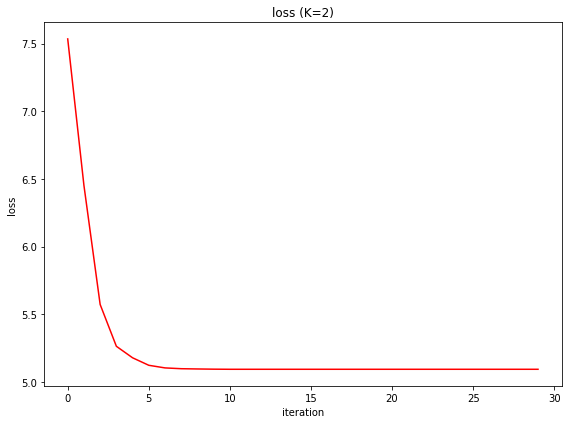

**************************************************
## [RESULT 06]
**************************************************


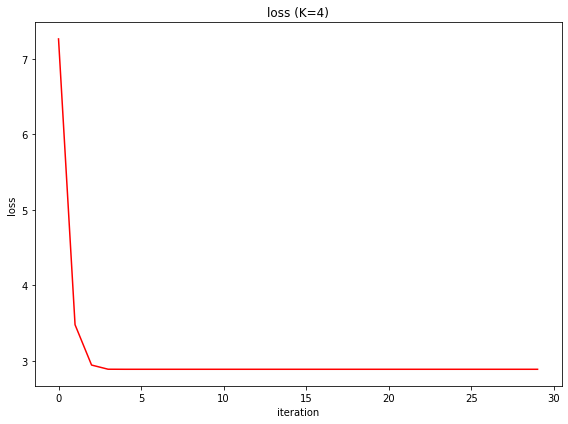

**************************************************
## [RESULT 07]
**************************************************


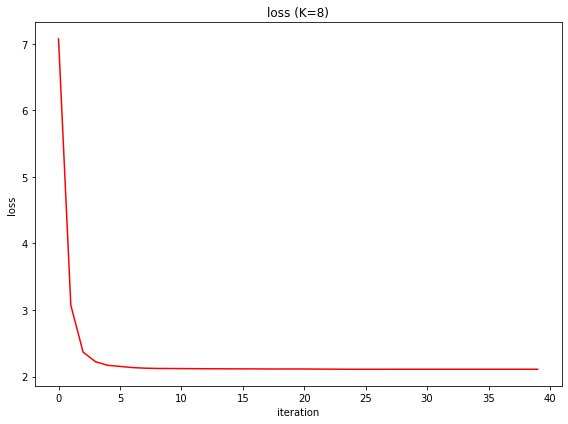

**************************************************
## [RESULT 08]
**************************************************


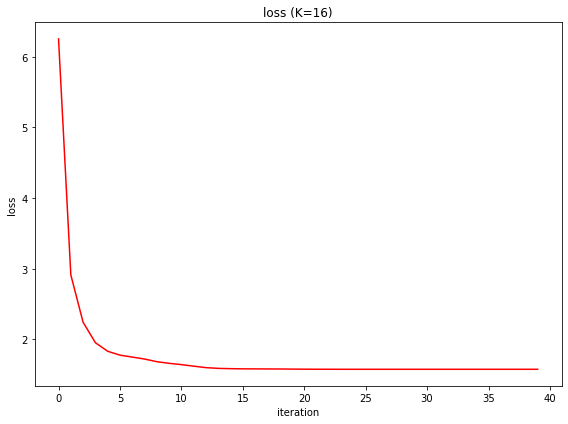

**************************************************
## [RESULT 09]
**************************************************


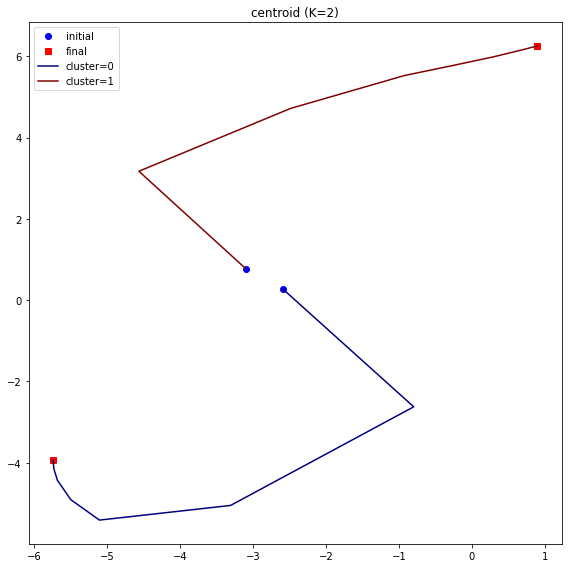

**************************************************
## [RESULT 10]
**************************************************


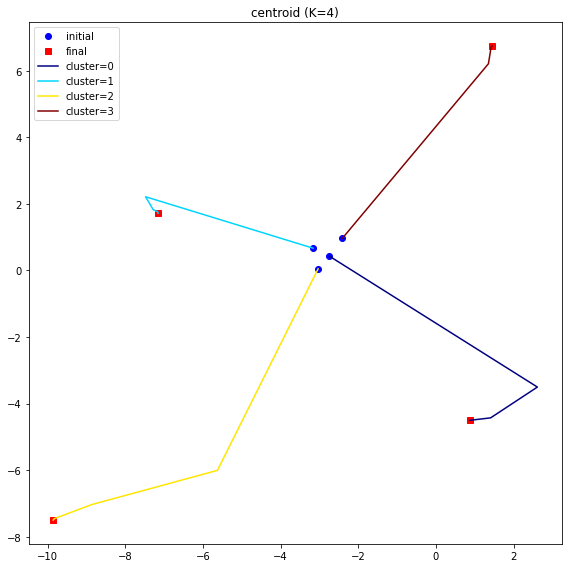

**************************************************
## [RESULT 11]
**************************************************


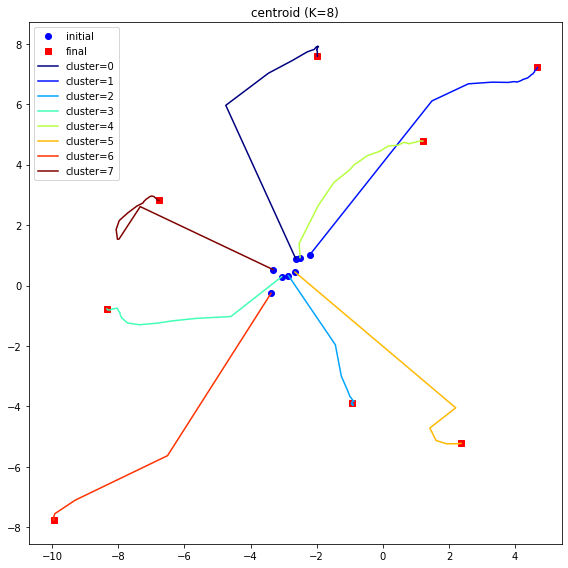

**************************************************
## [RESULT 12]
**************************************************


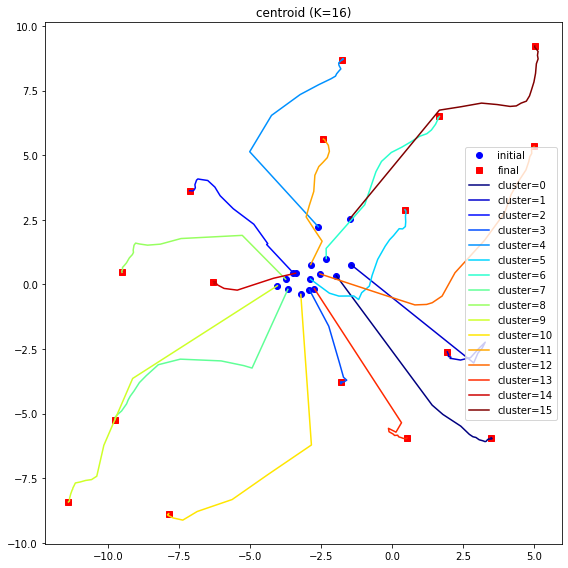

**************************************************
## [RESULT 13]
**************************************************
**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


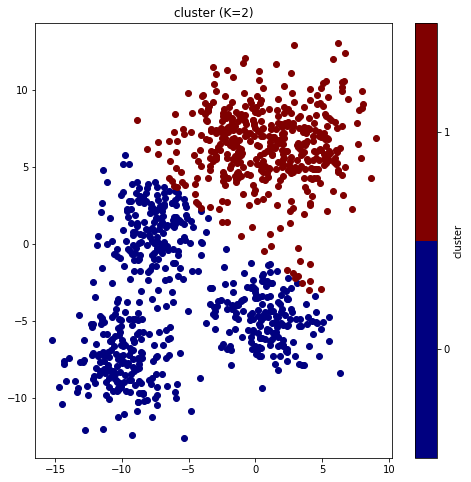

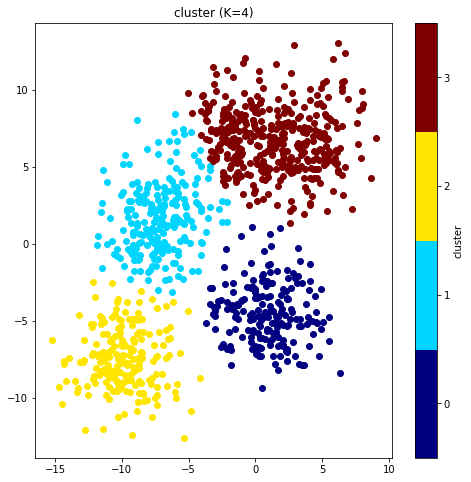

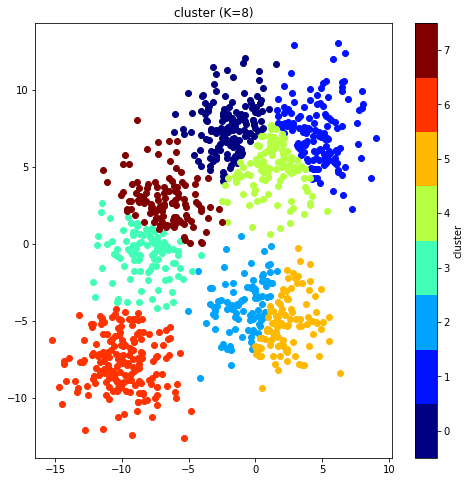

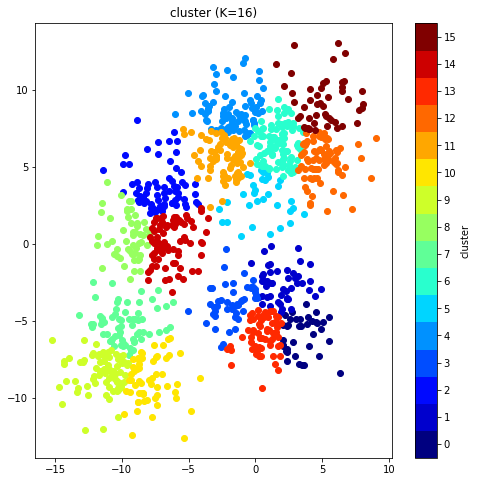

In [2075]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)